## Importing libs

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn .linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/

/content


In [7]:
data = pd.read_csv('TSLA.csv')

In [11]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


## Data Visualization

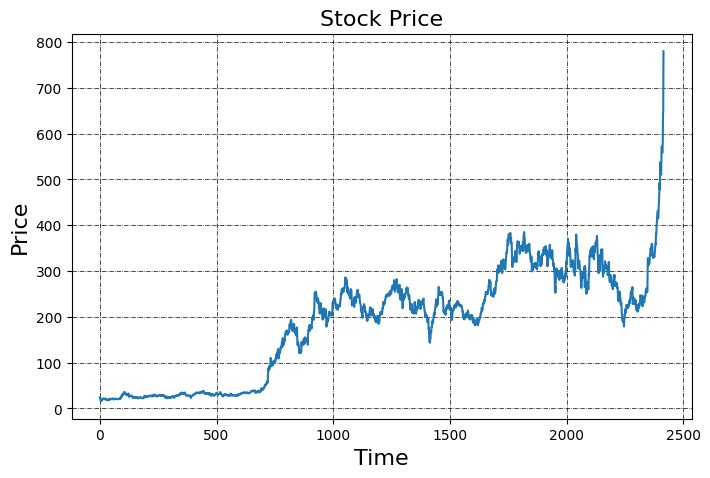

In [10]:
data['Close'].plot(figsize=(8,5))
plt.title("Stock Price", fontsize = 16) #Naming the graph
plt.ylabel("Price", fontsize = 16) #Y Label Name
plt.xlabel("Time", fontsize = 16) #X Label Name
plt.grid(which="major", color="k", linestyle= '-.', linewidth = 0.5)
plt.show()

In [11]:
X = data[['High', 'Low', 'Open', 'Volume']].values #Output : X
Y = data['Close'].values #Input: Y

In [12]:
#Split the data into training and testing set (80% Train, 20% Test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [13]:
#Print X_Train

print("Type of x_train: ", type(X_train))
print("First five elements of x_train are : \n", X_train[:5])


Type of x_train:  <class 'numpy.ndarray'>
First five elements of x_train are : 
 [[2.71179993e+02 2.66149994e+02 2.66250000e+02 7.82020000e+06]
 [1.98490005e+02 1.93449997e+02 1.97059998e+02 3.58940000e+06]
 [3.08500000e+01 2.96500000e+01 3.00000000e+01 1.47100000e+06]
 [2.26970001e+02 2.21750000e+02 2.22720001e+02 3.08710000e+06]
 [1.91830002e+02 1.75399994e+02 1.88589996e+02 2.07754000e+07]]


In [14]:
#Print Y_Train

print("Type of y_train: ", type(Y_train))
print("First five elements of Y_train are : \n", Y_train[:5])


Type of y_train:  <class 'numpy.ndarray'>
First five elements of Y_train are : 
 [269.200012 196.050003  30.73     223.570007 180.949997]


## ML Model


In [15]:
#Creating the linear regression model
model = LinearRegression()

#Training
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
print(model.coef_, model.intercept_)

[ 9.22113589e-01  7.21504771e-01 -6.45021778e-01 -3.53429220e-08] -0.02403821030520703


In [17]:
#Making Predictions on the test set
y_test_predicted = model.predict(X_test)

print("Type of predicted: ", type(y_test_predicted))
print("First five elements of predicted are:\n", y_test_predicted[:5])

Type of predicted:  <class 'numpy.ndarray'>
First five elements of predicted are:
 [ 31.44206177  24.52988898 278.90510109 330.67352198 262.08142218]


In [18]:
#Making Prediction on the train set
#this will tell us model overfited or underfited

y_train_predicted = model.predict(X_train)

In [19]:
print("Type of predicted: ", type(y_train_predicted))
print("First five elements of predicted are:\n", y_train_predicted[:5])

Type of predicted:  <class 'numpy.ndarray'>
First five elements of predicted are:
 [270.04977168 195.34653824  30.41313968 225.49340873 181.03802798]


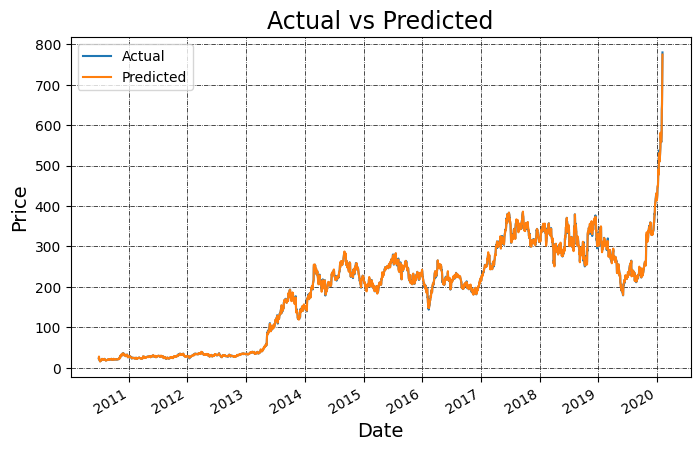

In [20]:
y_pred = model.predict(X)

# Creating a DataFrame with actual and predicted values
df_pred = pd.DataFrame({'Actual': Y.flatten(), 'Predicted': y_pred.flatten()})

# Set the 'Date' column in df_pred from the original data
df_pred['Date'] = data['Date']

# Converting date to datetime
df_pred['Date'] = pd.to_datetime(df_pred['Date'], format='%Y-%m-%d')  # Corrected the function name

# Create a plot similar to the one you provided
df_pred.set_index('Date')[['Actual', 'Predicted']].plot(figsize=(8, 5))

plt.title("Actual vs Predicted", fontsize=17)
plt.ylabel("Price", fontsize=14)
plt.xlabel("Date", fontsize=14)  # Corrected the xlabel to "Date"
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()



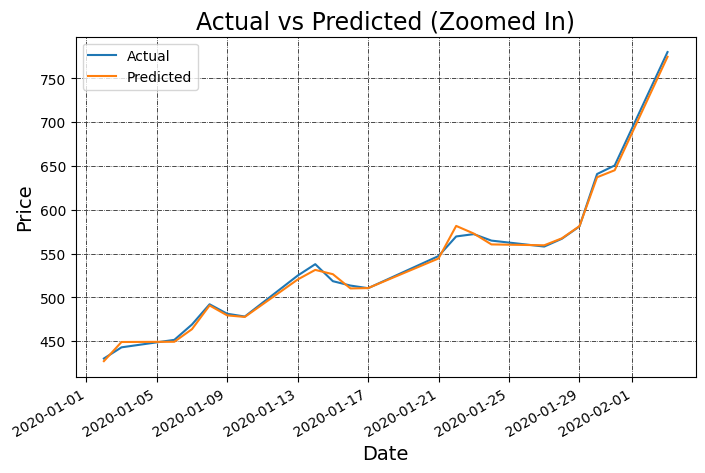

In [21]:
# Defining the date range for zooming in
start_date = '2020-01-01'
end_date = '2020-06-06'

# Creating a plot for zoomed-in period
zoomed_df = df_pred[(df_pred['Date'] >= start_date) & (df_pred['Date'] <= end_date)]

zoomed_df.set_index('Date')[['Actual', 'Predicted']].plot(figsize=(8, 5))

plt.title("Actual vs Predicted (Zoomed In)", fontsize=17)
plt.ylabel("Price", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()


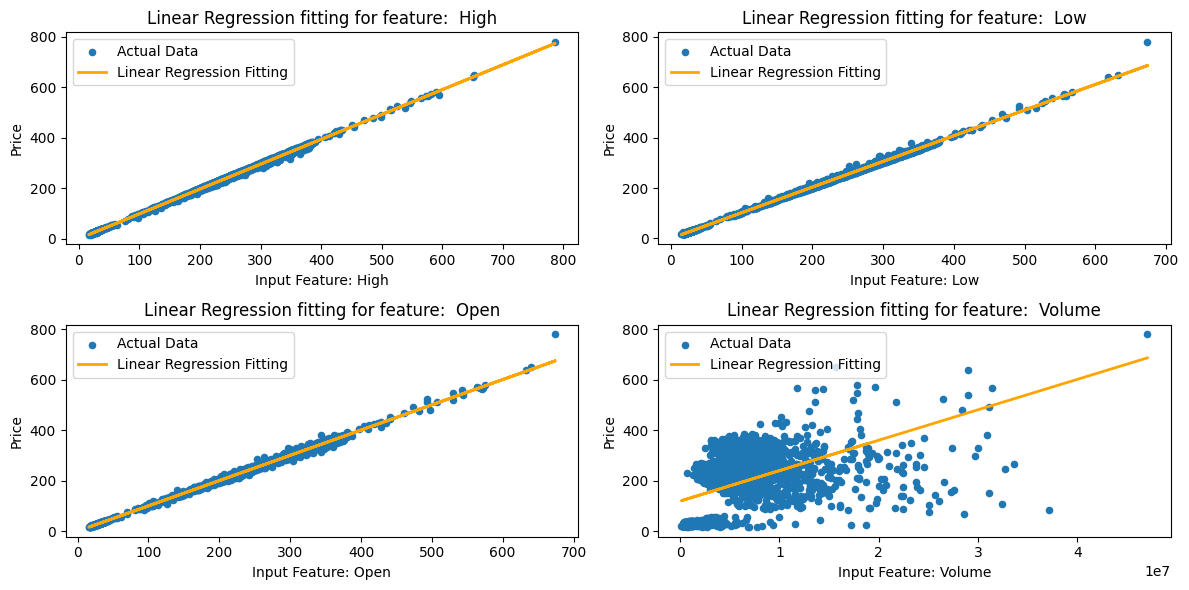

In [23]:
import matplotlib.pyplot as plt

feature_names = ['High', 'Low', 'Open', 'Volume']

plt.figure(figsize=(12, 6))

dot_size = 20

for feature_index in range(X.shape[1]):
    plt.subplot(2, 2, feature_index + 1)

    x_feature = X[:, feature_index]

    plt.scatter(x_feature, Y, label="Actual Data", s=dot_size)

    model.fit(x_feature.reshape(-1, 1), Y)
    y_pred = model.predict(x_feature.reshape(-1, 1))

    plt.plot(x_feature, y_pred, color='orange', linewidth=2, label='Linear Regression Fitting')

    plt.xlabel(f'Input Feature: {feature_names[feature_index]}', fontsize=10)
    plt.ylabel(f'Price', fontsize=10)
    plt.title(f'Linear Regression fitting for feature:  {feature_names[feature_index]}', fontsize=12)
    plt.legend(fontsize=10)

plt.tight_layout()
plt.show()
